In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px


In [150]:
data = pd.read_csv('data.csv')
data.head()

,DATE,USPHCI,INDPRO,RSI,NFP,HYS
0,1/11/2003,90.27,92.13,308527,130482,4.62
1,1/12/2003,90.48,92.17,307407,130595,4.28
2,1/01/2004,90.65,92.33,309254,130765,3.94
3,1/02/2004,90.84,92.89,311393,130822,4.26
4,1/03/2004,91.04,92.53,316912,131139,4.40


In [111]:
data.shape

(241, 6)

In [112]:
data.columns

Index(['DATE', 'USPHCI', 'INDPRO', 'RSI', 'NFP', 'HYS'], dtype='object')

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    241 non-null    object 
 1   USPHCI  241 non-null    float64
 2   INDPRO  241 non-null    float64
 3   RSI     241 non-null    int64  
 4   NFP     241 non-null    int64  
 5   HYS     241 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


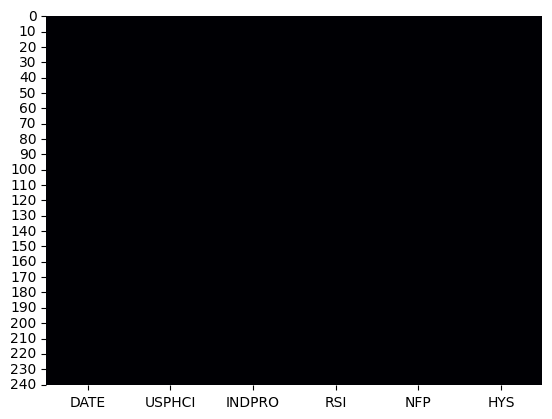

In [114]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [115]:
data.describe()

,USPHCI,INDPRO,RSI,NFP,HYS
count,241.00,241.00,241.00,241.00,241.00
mean,110.79,98.20,446624.85,140355.59,5.18
std,13.96,4.49,107078.65,7705.29,2.62
min,90.27,84.60,307407.00,129700.00,2.57
25%,98.61,95.88,360691.00,133935.00,3.69
50%,107.42,99.07,419051.00,138072.00,4.42
75%,122.72,101.69,499995.00,146772.00,5.87
max,139.81,104.12,705981.00,157016.00,20.31


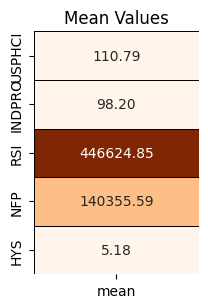

In [151]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (3,4))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)


#### Exploratory Data Analysis

In [152]:
col = list(data.columns)
col.remove('DATE')
#categorical_features = ['country']
numerical_features = [*col]
#print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Numerical Features : USPHCI INDPRO RSI NFP HYS


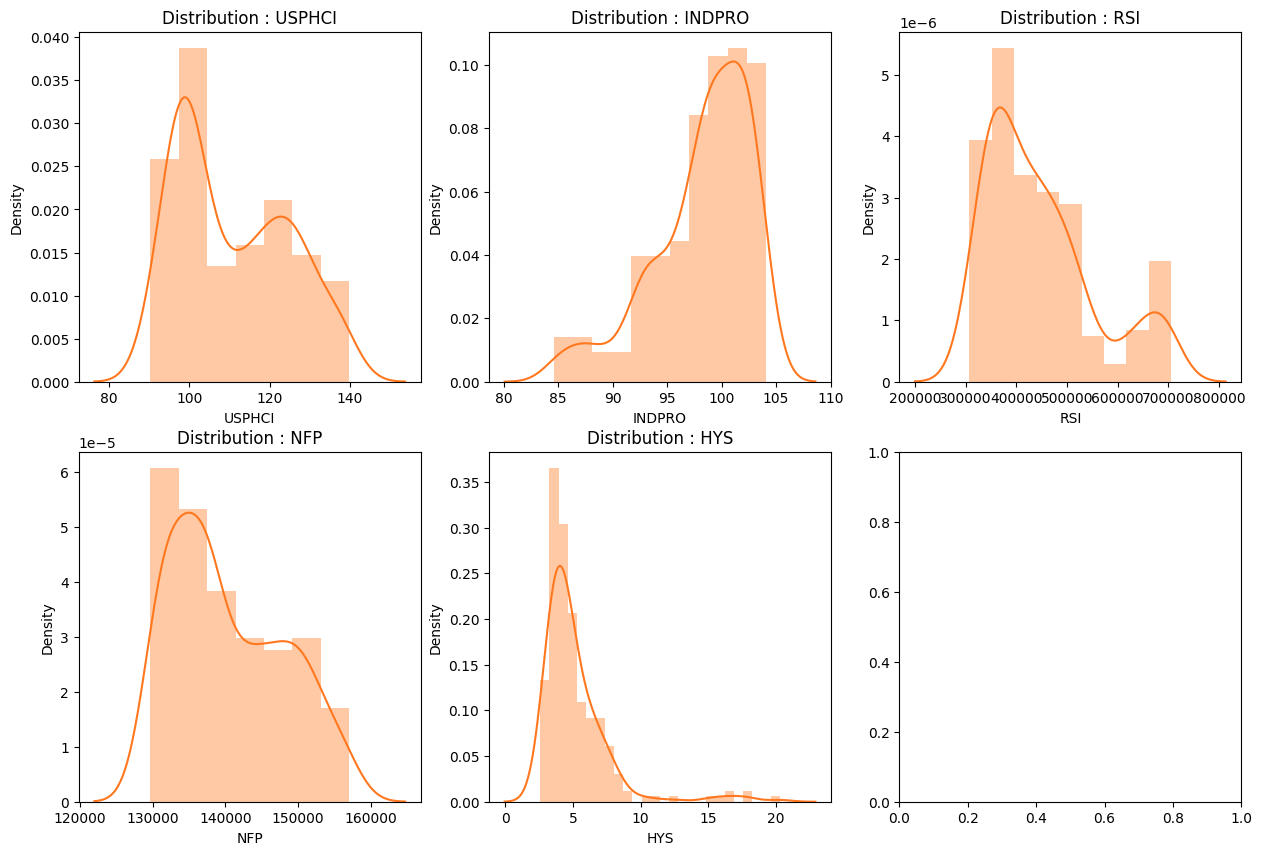

In [153]:
# Distribution of Features
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (15,10))
for i in range(len(numerical_features)):
    plt.subplot(2,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [154]:
len(data['DATE'].unique()) == len(data)

True

In [35]:
# fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
# plt.subplot(1,3,1)
# ax = sns.barplot(x = 'DATE',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
# plt.title('Countries with High Children Mortalitiy')
# for rect in ax.patches:
#     ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
#             horizontalalignment='center', fontsize = 12)

# plt.subplot(1,3,2)
# ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
# plt.title('Countries with Medial Children Mortalitiy')
# for rect in ax.patches:
#     ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
#             horizontalalignment='center', fontsize = 12)

# plt.subplot(1,3,3)
# ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
# plt.title('Countries with Low Children Mortalitiy')
# for rect in ax.patches:
#     ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
#             horizontalalignment='center', fontsize = 12)
# plt.show()

#### Numerical Features

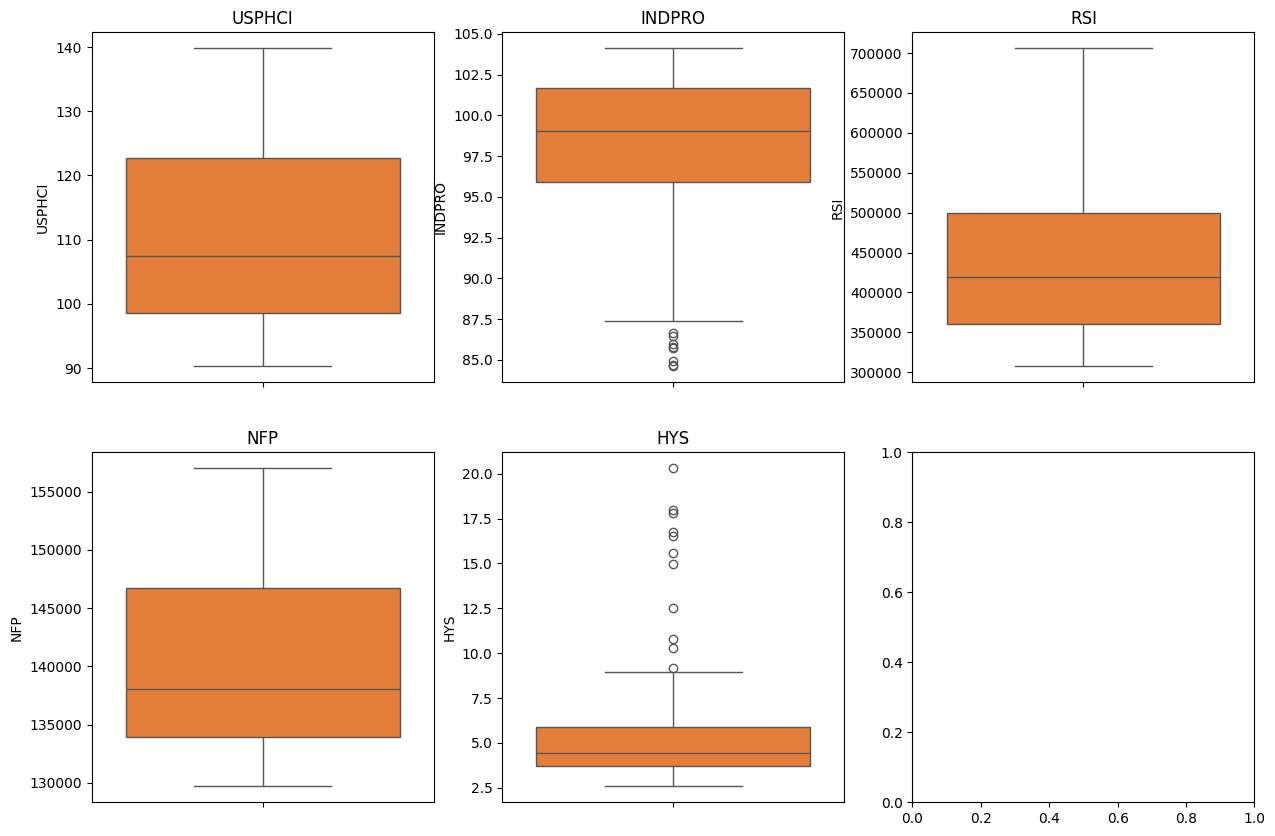

In [155]:
fig  = plt.subplots(nrows = 2,ncols = 3,figsize = (15,10))
for i in range(len(numerical_features)):
    plt.subplot(2,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

#### Correlation Matrix

In [156]:
data = data.drop(['DATE'], axis=1)

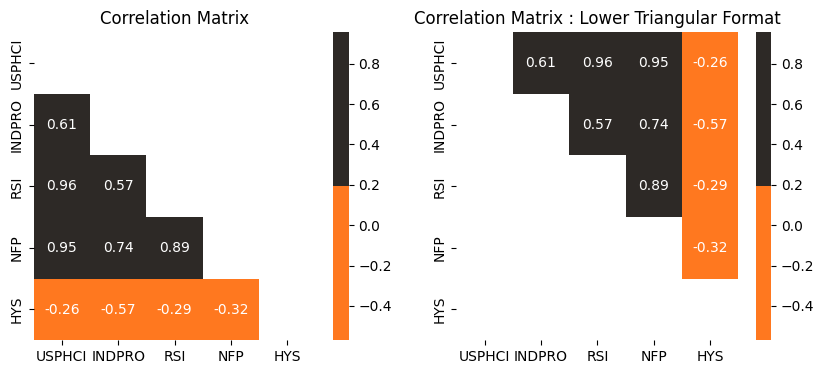

In [157]:
ut = np.triu(data.corr())
lt = np.tril(data.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (10,4))
plt.subplot(1,2,1)
sns.heatmap(data.corr(),cmap = colors, annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix');

plt.subplot(1,2,2)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

In [158]:
data.drop(['NFP', 'RSI'], axis=1, inplace = True)

In [159]:
data.head()

,USPHCI,INDPRO,HYS
0,90.27,92.13,4.62
1,90.48,92.17,4.28
2,90.65,92.33,3.94
3,90.84,92.89,4.26
4,91.04,92.53,4.40


#### Data Scaling

In [160]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1 = data

df1['USPHCI'] = mms.fit_transform(df1[['USPHCI']])
df1['INDPRO'] = mms.fit_transform(df1[['INDPRO']])
df1['HYS'] = mms.fit_transform(df1[['HYS']])
#df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

,USPHCI,INDPRO,HYS
0,0.00,0.39,0.12
1,0.00,0.39,0.10
2,0.01,0.40,0.08
3,0.01,0.42,0.10
4,0.02,0.41,0.10


In [ ]:
#### Principal Component Analysis (PCA)

In [ ]:
# df2 = data.copy(deep = True)

# col = list(data.columns)
# col.remove('health'); col.remove('country')

# df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

# for i in col:
#     df2[i] = mms.fit_transform(df2[[i]]) # Normalization
# df2.drop(columns = 'country',inplace = True) 
# df2.head()

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA()
# pca_df2 = pd.DataFrame(pca.fit_transform(df2))
# pca.explained_variance

In [ ]:
# plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Eigen Values')
# plt.ylabel('Ratio of Variance Explained')
# plt.title('Variance Covered by each Eigen Value')
# plt.show()

In [ ]:
# pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
# pca_df2.head()

#### Modeling : Density Based Spatial Clustering of Application with Noise Clustering
- DBSCAN Clustering is a density based clustering algorithm that is used for unsupervised learning problems.

In [161]:
m1 = df1.values
# m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
# m2 = pca_df2.values # PCA Data

In [162]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Text(0.5, 1.0, 'K-Distance Graph')

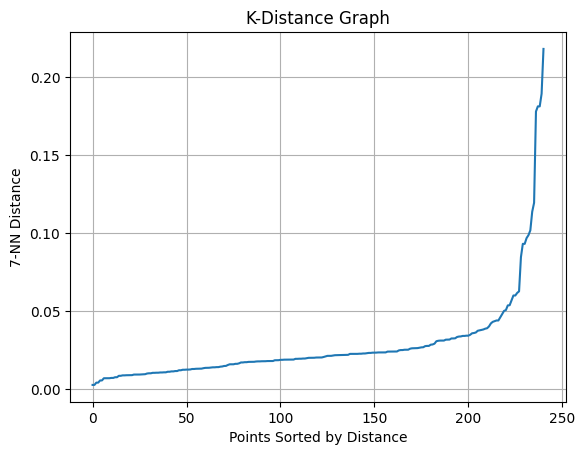

In [163]:
# Feature Combination : Health - Trade - Finance
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')

In [167]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; df1['Class'] = labels


Number of Clusters :  4
Number of Outliers :  43


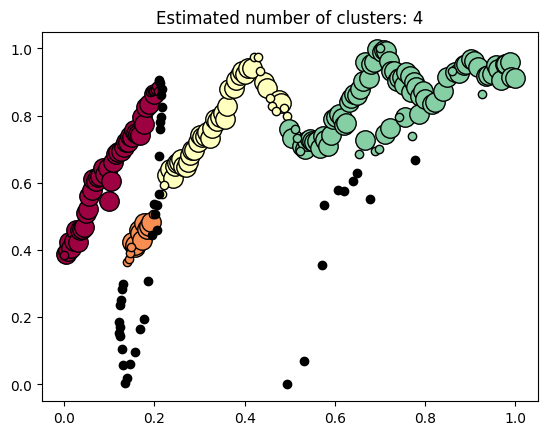

In [168]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


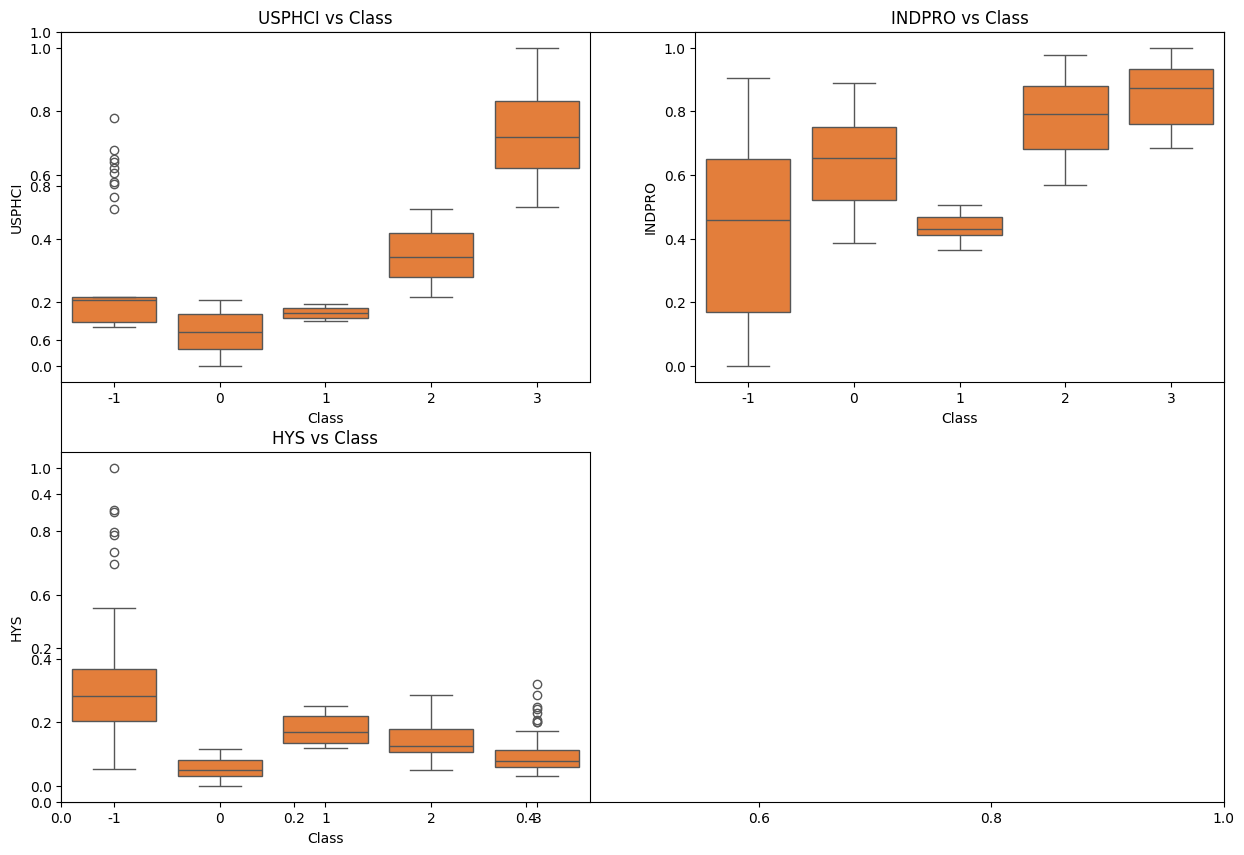

In [173]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10))

plt.subplot(2,2,1)
sns.boxplot(x = 'Class', y = 'USPHCI', data  = data, color = '#FF781F');
plt.title('USPHCI vs Class')

plt.subplot(2,2,2)
sns.boxplot(x = 'Class', y = 'INDPRO', data  = data, color = '#FF781F');
plt.title('INDPRO vs Class')

plt.subplot(2,2,3)
sns.boxplot(x = 'Class', y = 'HYS', data  = data, color = '#FF781F');
plt.title('HYS vs Class')

plt.show()

In [183]:
# # create model and predictionmodel = DBSCAN(min_samples=6)
# predict = pd.DataFrame(model.fit_predict(feature))
# db.columns=['predict']
# # concatenate labels to df as a new column
# r = pd.concat([feature,predict],axis=1)


# from mpl_toolkits.mplot3d import Axes3D
# # scatter plot
# fig = plt.figure( figsize=(6,6))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# ax.scatter(r['USPHCI'],r['INDPRO'],r['HYS'],c=r['predict'],alpha=0.5)
# ax.set_xlabel('USPHCI')
# ax.set_ylabel('INDPRO')
# ax.set_zlabel('HYS')
# plt.show()


In [ ]:
# # PCA Data

# knn = NearestNeighbors(n_neighbors = 7)
# model = knn.fit(m2)
# distances, indices = knn.kneighbors(m2)
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.xlabel('Points Sorted by Distance')
# plt.ylabel('7-NN Distance')
# plt.title('K-Distance Graph');
# plt.grid()
# plt.plot(distances)

In [ ]:
# db = DBSCAN(eps = 0.2, min_samples = 8).fit(m2)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)
# print('Number of Clusters : ', n_clusters_)
# print('Number of Outliers : ', n_noise_)

# data['Class'] = labels; pca_df2['Class'] = labels

In [ ]:
# unique_labels = set(labels)
# colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]
#     class_member_mask = labels == k

#     xy = m2[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

#     xy = m2[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

# plt.title("Estimated number of clusters: %d" % n_clusters_)
# plt.show()


In [ ]:
# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# plt.subplot(1,2,1)
# sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
# plt.title('child_mort vs Class')

# plt.subplot(1,2,2)
# sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
# plt.title('income vs Class')

# plt.show()

#### K-Means Clustering

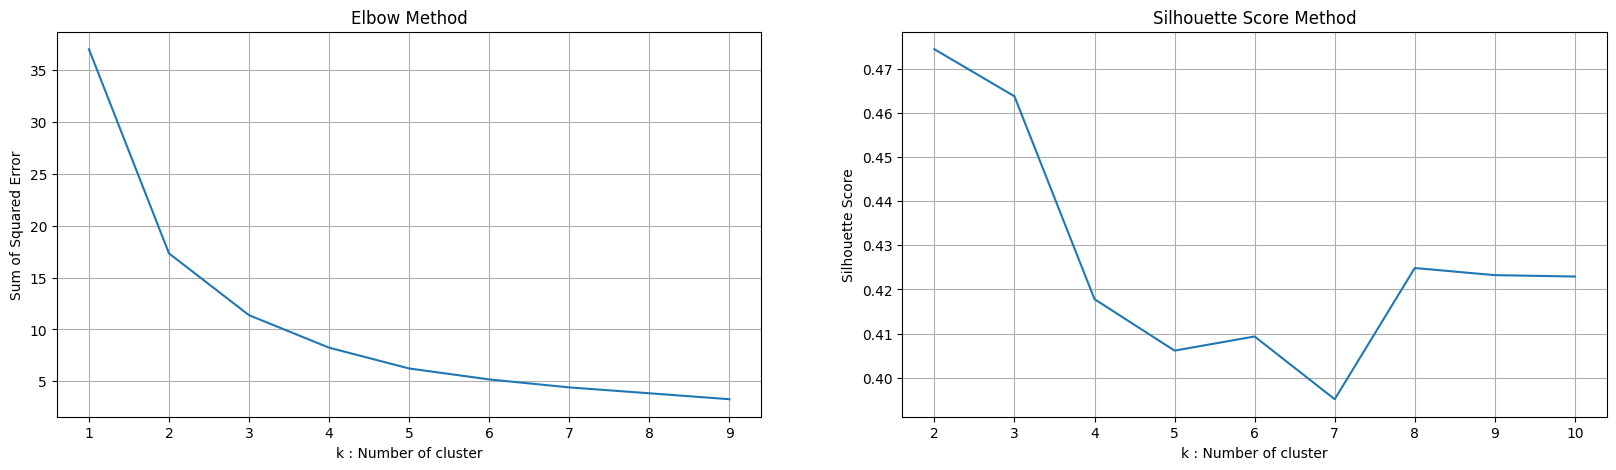

In [174]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

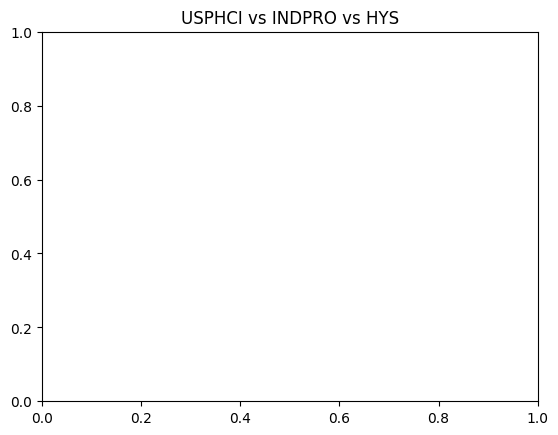

In [178]:
model = KMeans(n_clusters = 4, max_iter = 1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels; df1['Class'] = labels

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x = np.array(df1['USPHCI'])
y = np.array(df1['INDPRO'])
z = np.array(df1['HYS'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
ax.scatter(x,y,z,c = y)
plt.title('USPHCI vs INDPRO vs HYS')
ax.set_xlabel('USPHCI')
ax.set_ylabel('INDPRO')
ax.set_zlabel('HYS')
plt.show()

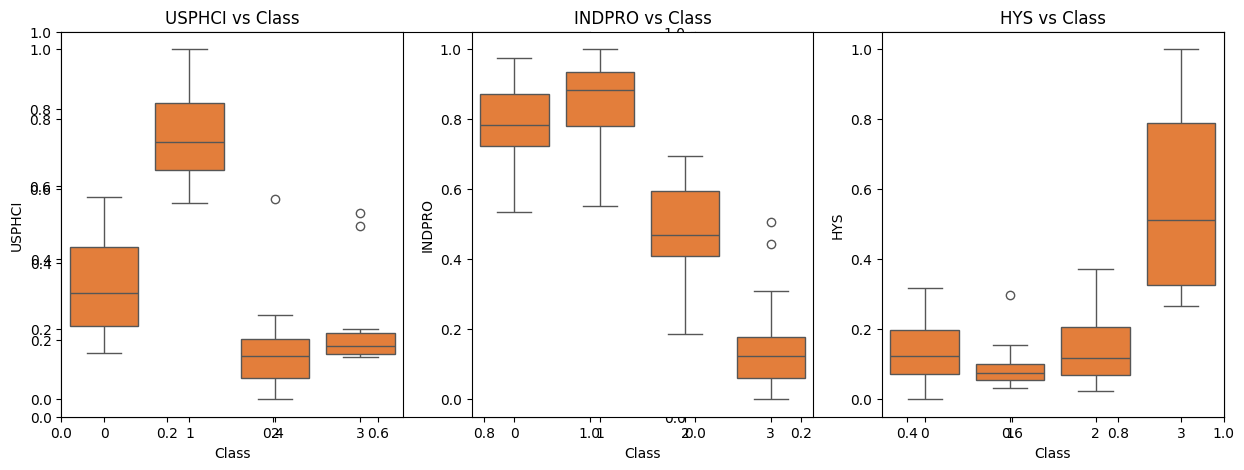

In [179]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Class', y = 'USPHCI', data  = data, color = '#FF781F');
plt.title('USPHCI vs Class')

plt.subplot(1,3,2)
sns.boxplot(x = 'Class', y = 'INDPRO', data  = data, color = '#FF781F');
plt.title('INDPRO vs Class')

plt.subplot(1,3,3)
sns.boxplot(x = 'Class', y = 'HYS', data  = data, color = '#FF781F');
plt.title('HYS vs Class')

plt.show()

In [ ]:
# # Elbow Method & Silhouette Score Method

# sse = {};sil = [];kmax = 10
# fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# # Elbow Method :
# plt.subplot(1,2,1)
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
# plt.title('Elbow Method')
# plt.xlabel("k : Number of cluster")
# plt.ylabel("Sum of Squared Error")
# plt.grid()

# # Silhouette Score Method
# plt.subplot(1,2,2)
# for k in range(2, kmax + 1):
#     kmeans = KMeans(n_clusters = k).fit(m2)
#     labels = kmeans.labels_
#     sil.append(silhouette_score(m2, labels, metric = 'euclidean'))
# sns.lineplot(x = range(2,kmax + 1), y = sil);
# plt.title('Silhouette Score Method')
# plt.xlabel("k : Number of cluster")
# plt.ylabel("Silhouette Score")
# plt.grid()

# plt.show()

In [ ]:
# model = KMeans(n_clusters = 3,max_iter = 1000)
# model.fit(m2)
# cluster = model.cluster_centers_
# centroids = np.array(cluster)
# labels = model.labels_
# data['Class'] = labels; pca_df2['Class'] = labels

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
# plt.title('PCA Data')
# ax.set_xlabel('0th Component')
# ax.set_ylabel('1st Component')
# ax.set_zlabel('2nd Component')
# ax.scatter(x,y,z,c = y)
# plt.show()

In [ ]:
# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# plt.subplot(1,2,1)
# sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
# plt.title('child_mort vs Class')

# plt.subplot(1,2,2)
# sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
# plt.title('income vs Class')

# plt.show()